In [84]:
import os
import csv
import numpy as np
import pandas as pd
import keras
import time
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

%matplotlib inline
plt.rcParams["figure.figsize"] = (4, 8)
plt.rcParams["xtick.labelsize"] = 7

# Reproducibility
seed = 13
np.random.seed(seed=seed)
tf.set_random_seed(seed=seed)

# config=tf.ConfigProto(device_count = {"GPU" : 2, "CPU" : 16})
# sess = tf.Session(config=config)
# keras.backend.set_session(sess)

### Data Preprocessing

In [81]:
df = pd.read_csv("crop_data.csv")
df.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [82]:
df["label"].value_counts()    # Check for class imbalance

Jute            100
pomegranate     100
Lentil          100
millet          100
banana          100
Peas            100
Moth Beans      100
papaya          100
Rubber          100
rice            100
orange          100
Pigeon Peas     100
Cotton          100
Adzuki Beans    100
Chickpea        100
grapes          100
mango           100
Tobacco         100
Coconut         100
Black gram      100
Ground Nut      100
Mung Bean       100
maize           100
wheat           100
Coffee          100
watermelon      100
Kidney Beans    100
Sugarcane       100
Tea             100
muskmelon       100
apple           100
Name: label, dtype: int64

In [83]:
x = df.iloc[:, :-1]
y = df["label"]

In [ ]:
sns.catplot(x="label", y="temperature", data=df)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light'
)
plt.savefig("./results/temps.png", dpi=500)

In [ ]:
sns.catplot(x="label", y="humidity", data=df)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light'
)
plt.savefig("./results/humidities.png", dpi=500)

In [ ]:
# Normalise
x_scaler = MinMaxScaler()
x_scaler.fit(x)
x_norm = x_scaler.transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.3, random_state=seed)

### Logistic Regression

In [113]:
model_lr = LogisticRegression(solver='newton-cg', penalty='l2', multi_class='multinomial', max_iter=1000, C=10)

In [114]:
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)

In [115]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        23
  Black gram       0.76      0.85      0.80        26
    Chickpea       1.00      0.81      0.90        32
     Coconut       0.81      0.96      0.88        26
      Coffee       0.79      0.70      0.74        37
      Cotton       0.95      0.56      0.70        34
  Ground Nut       0.87      0.77      0.82        35
        Jute       0.85      0.88      0.86        32
Kidney Beans       0.84      0.97      0.90        33
      Lentil       0.83      0.83      0.83        36
  Moth Beans       0.69      0.56      0.62        32
   Mung Bean       0.83      0.74      0.78        34
        Peas       0.93      1.00      0.96        37
 Pigeon Peas       0.58      0.44      0.50        25
      Rubber       0.92      0.81      0.86        27
   Sugarcane       0.82      0.67      0.73        27
         Tea       0.82      1.00      0.90        27
     Tobacco       0.70    

Text(69.0, 0.5, 'Actual')

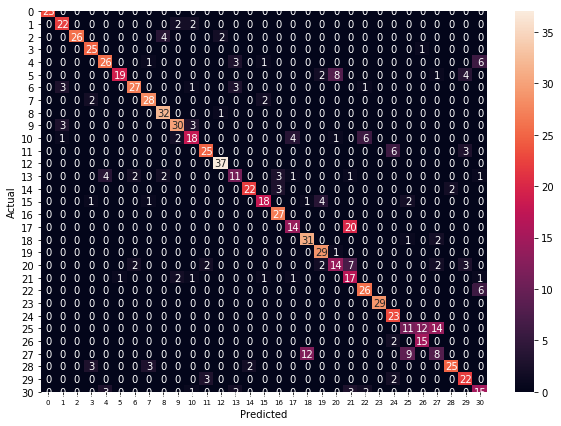

In [116]:
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Support Vector Machine

In [98]:
model_svm = SVC(C=10, gamma=10)

In [99]:
model_svm.fit(x_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [100]:
model_svm.score(x_test, y_test)

0.9053763440860215